# For viewing the classification metrics and creating plots

# TODO: cell 30 data aggregation...

In [1]:
# imports
import pandas as pd
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# display options
pd.options.display.max_columns = 60

In [2]:
# data_pth='/mnt/g/Planet/project_data/classification_stats_x4_400000_global_valid_mod.csv'
# data_pth='/mnt/g/Planet/project_data/classification_stats_x4_400000_shield2_hold_mod_first2k.csv'
# data_pth='/mnt/g/Planet/project_data/classification_stats_x10_local-masked_400000_tmp_1k.csv'
# data_pth='/home/ethan_kyzivat/code/pixel-smasher/classification_stats_x10_local-masked_400000_save.csv'
# data_pth='/home/ethan_kyzivat/code/pixel-smasher/classification_stats_x10_local-masked_400000_OA_OA_p.csv'
# data_pth='/home/ethan_kyzivat/code/pixel-smasher/classification_stats_x10_local-masked_400000_ir_global_thresh.csv'
data_pth='/home/ethan_kyzivat/code/pixel-smasher/classification_stats_x4_local-masked_400000_ir_global_thresh.csv'

plots_dir='/data_dir/other/figs'
data=pd.read_csv(data_pth)
del data['Unnamed: 0']
data.head()

,num,name,thresh,res,percent_water,mean_ndwi,median_ndwi,accuracy,accuracy_p,kappa,kappa_p,min_ndwi,max_ndwi
0,0,20170709_180523_1005_3B_AnalyticMS_SR_s0073,0.0,SR,19.950955,197.24469,236.0,0.997773,0.529771,0.993029,0.032496,22.0,255.0
1,0,20170709_180523_1005_3B_AnalyticMS_SR_s0073,0.0,HR,19.951389,200.07439,240.0,NaN,NaN,NaN,NaN,27.0,255.0
2,0,20170709_180523_1005_3B_AnalyticMS_SR_s0073,0.0,LR,20.131944,200.03084,240.0,NaN,NaN,NaN,NaN,31.0,255.0
3,0,20170709_180523_1005_3B_AnalyticMS_SR_s0073,0.0,Bic,19.873264,200.01488,240.0,0.997604,0.470229,0.992488,-0.030729,31.0,255.0
4,1,20170707_181137_1035_3B_AnalyticMS_SR_s0106,0.0,SR,56.167535,98.69373,28.0,0.996714,0.596100,0.993327,0.172175,0.0,255.0


## Now, filter data by image and/or resolution

In [3]:
# filter to verifiy number of images
data[['num','res','thresh','kappa']].head()
print(f'Number of images: {data.num.unique().size}')

SyntaxError: invalid syntax (<ipython-input-3-1dd8e1a7af32>, line 3)

In [4]:
## Set kappa prime values that are negative to zero to avoid biasing the averaging!
# Avoiding chaining errors (here: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)
# data_c=data.copy()
''' 
Don't do:
data['kappa_p2']=np.max(data['kappa_p'], data.thresh)
data['kappa_p'][data.iloc[:,[8]]<0]=0
data['kappa_p'][data['kappa_p']<0]=0
'''

###### uncomment to use
# zmask=data['kappa_p']<0
# zmask
# data.loc[zmask, 'kappa_p']=0
# data.head(30)

" \nDon't do:\ndata['kappa_p2']=np.max(data['kappa_p'], data.thresh)\ndata['kappa_p'][data.iloc[:,[8]]<0]=0\ndata['kappa_p'][data['kappa_p']<0]=0\n"

In [5]:
display(data.shape)
data.describe()

(8520, 13)

,num,thresh,percent_water,mean_ndwi,median_ndwi,accuracy,accuracy_p,kappa,kappa_p,min_ndwi,max_ndwi
count,8520.000000,8520.0,8520.000000,8520.000000,8520.00000,4260.000000,4254.000000,4254.000000,4254.000000,8520.000000,8520.000000
mean,1064.500000,0.0,25.107101,179.425497,197.73615,0.997200,0.500000,0.990026,0.003446,20.047418,254.184390
std,614.914056,0.0,21.380458,44.569029,65.07489,0.015443,0.082679,0.033663,0.122303,13.218201,12.573191
min,0.000000,0.0,0.000000,10.353090,1.00000,0.606610,0.000121,0.003713,-0.695652,0.000000,31.000000
25%,532.000000,0.0,10.245551,164.414688,205.00000,0.997687,0.440728,0.990917,-0.080498,12.000000,255.000000
50%,1064.500000,0.0,18.139106,193.601220,222.00000,0.998351,0.500000,0.993542,0.000000,19.000000,255.000000
75%,1597.000000,0.0,32.644640,208.881975,232.00000,0.998872,0.559272,0.995357,0.085645,27.000000,255.000000
max,2129.000000,0.0,99.878906,240.552080,255.00000,1.000000,0.999879,0.999003,0.727273,182.000000,255.000000


In [42]:
# data.to_csv('tmp.csv')

# Pivot (not Crosstab)

In [6]:
ct=data.pivot(index='num',columns='res')
del ct['thresh']
ct.drop(labels=([('name', 'SR'), ('name','LR'), ('name','Bic')]), axis=1, inplace=True)
ct[:10]
# foo= (ct.name[j] for j in ['LR', 'SR','Bic'])

name percent_water             \
res                                           HR           Bic         HR   
num                                                                         
0    20170709_180523_1005_3B_AnalyticMS_SR_s0073     19.873264  19.951389   
1    20170707_181137_1035_3B_AnalyticMS_SR_s0106     56.081163  56.181858   
2    20170709_180724_1030_3B_AnalyticMS_SR_s0234      4.719184   4.838976   
3    20170709_180523_1005_3B_AnalyticMS_SR_s0291      6.285156   6.256510   
4    20170709_180654_1030_3B_AnalyticMS_SR_s0028     17.221788  17.279514   
5    20170709_180724_1030_3B_AnalyticMS_SR_s0147     30.217014  30.306858   
6    20170708_181118_102a_3B_AnalyticMS_SR_s0077      8.400608   8.427951   
7    20170709_180516_1005_3B_AnalyticMS_SR_s0107      1.490885   1.520399   
8    20170709_180654_1030_3B_AnalyticMS_SR_s0115     16.670139  16.641927   
9    20170710_181144_1034_3B_AnalyticMS_SR_s0213     21.976128  22.016493   

                           mean_ndwi                                    \
res         LR         SR        Bic          HR         LR         SR   
num                                                                      
0    20.131944  19.950955  200.01488  200.074390  200.03084  197.24469   
1    56.048611  56.167535  100.73647  100.764305  100.74104   98.69373   
2     4.819444   4.811632  216.83932  216.887500  216.84980  214.27274   
3     6.458333   6.273872  228.09492  228.118330  228.10034  224.62138   
4    17.298611  17.291233  199.44237  199.533340  199.46758  196.60959   
5    30.229167  30.326389  163.98010  164.008910  163.98785  161.16460   
6     8.430556   8.436198  216.77074  216.800870  216.77605  212.89091   
7     1.583333   1.513889  238.37535  238.420600  238.38528  235.14624   
8    16.798611  16.623264  201.14166  201.191250  201.15535  198.10338   
9    22.027778  22.023438  179.35146  179.411680  179.36542  176.50890   

    median_ndwi                       accuracy                   accuracy_p  \
res         Bic     HR     LR     SR       Bic  HR  LR        SR        Bic   
num                                                                           
0         240.0  240.0  240.0  236.0  0.997604 NaN NaN  0.997773   0.470229   
1          33.0   30.0   32.0   28.0  0.995816 NaN NaN  0.996714   0.403900   
2         224.0  224.0  224.0  221.0  0.997691 NaN NaN  0.998424   0.331337   
3         243.0  243.0  243.0  239.0  0.999036 NaN NaN  0.998828   0.595238   
4         242.0  243.0  243.0  239.0  0.998772 NaN NaN  0.998928   0.450820   
5         209.0  208.0  209.0  205.0  0.996957 NaN NaN  0.997279   0.452806   
6         230.0  230.0  230.0  226.0  0.998963 NaN NaN  0.999232   0.386029   
7         248.0  249.0  249.0  246.0  0.999583 NaN NaN  0.999753   0.290323   
8         236.0  236.0  236.0  232.0  0.997973 NaN NaN  0.998051   0.484694   
9         214.0  214.0  214.0  210.0  0.998390 NaN NaN  0.998637   0.431325   

                          kappa                     kappa_p                    \
res  HR  LR        SR       Bic  HR  LR        SR       Bic  HR  LR        SR   
num                                                                             
0   NaN NaN  0.529771  0.992488 NaN NaN  0.993029 -0.030729 NaN NaN  0.032496   
1   NaN NaN  0.596100  0.991504 NaN NaN  0.993327 -0.164042 NaN NaN  0.172175   
2   NaN NaN  0.668663  0.974630 NaN NaN  0.982847 -0.180100 NaN NaN  0.235466   
3   NaN NaN  0.404762  0.991803 NaN NaN  0.990023  0.193777 NaN NaN -0.195370   
4   NaN NaN  0.549180  0.995698 NaN NaN  0.996251 -0.036462 NaN NaN  0.041094   
5   NaN NaN  0.547194  0.992792 NaN NaN  0.993559 -0.068969 NaN NaN  0.072329   
6   NaN NaN  0.613971  0.993270 NaN NaN  0.995025 -0.196124 NaN NaN  0.206843   
7   NaN NaN  0.709677  0.985952 NaN NaN  0.991721 -0.123353 NaN NaN  0.211617   
8   NaN NaN  0.515306  0.992699 NaN NaN  0.992973 -0.032547 NaN NaN  0.032426   
9   NaN NaN  0.568675  0.995308 NaN NaN  0.996032 -0.126654 NaN NaN  0.129081  

In [44]:
    # Save CrossTab
# ct.to_csv(os.path.join(plots_dir, 'Shield_holdout_v2_x10_crosstab.csv'))
# ct.to_csv(os.path.join(plots_dir, 'Shield_holdout_v2_x4_crosstab.csv'))
# print('Saved CT CROSSTAB')

In [7]:
    # save describe
# ct_describe=ct.describe()
# ct_describe.to_csv(os.path.join(plots_dir, 'stats_x10_crosstab_describe.csv'))
# ct_describe.to_csv(os.path.join(plots_dir, 'stats_x4_crosstab_describe.csv'))

# print('Saved CT DESCRIBE')

percent_water                                           mean_ndwi  \
res             Bic           HR           LR           SR          Bic   
count   2130.000000  2130.000000  2130.000000  2130.000000  2130.000000   
mean      25.065402    25.123060    25.151389    25.088555   180.084786   
std       21.408171    21.403876    21.398405    21.326236    44.749774   
min        0.000000     0.000000     0.000000     0.000000    11.795942   
25%       10.212023    10.234049    10.319444    10.254449   164.880832   
50%       18.065104    18.176432    18.135417    18.153429   194.371350   
75%       32.541884    32.663194    32.666667    32.690321   209.590620   
max       99.868924    99.878906    99.875000    99.852865   240.496250   

                                              median_ndwi               \
res             HR           LR           SR          Bic           HR   
count  2130.000000  2130.000000  2130.000000  2130.000000  2130.000000   
mean    180.133054   180.095648   177.388500   198.609624   198.464789   
std      44.758261    44.751039    43.981319    65.365977    65.392553   
min      11.813169    11.799027    10.353090     2.000000     2.000000   
25%     164.910690   164.891198   162.257190   207.000000   206.000000   
50%     194.439895   194.384205   191.405510   223.000000   223.000000   
75%     209.643532   209.602575   206.428840   233.000000   233.000000   
max     240.552080   240.506100   237.073940   255.000000   255.000000   

                                    accuracy                         \
res             LR           SR          Bic   HR   LR           SR   
count  2130.000000  2130.000000  2130.000000  0.0  0.0  2130.000000   
mean    198.598826   195.271362     0.997454  NaN  NaN     0.996947   
std      65.418611    64.096208     0.010277  NaN  NaN     0.019270   
min       2.000000     1.000000     0.704696  NaN  NaN     0.606610   
25%     207.000000   203.000000     0.997604  NaN  NaN     0.997808   
50%     223.000000   219.000000     0.998247  NaN  NaN     0.998424   
75%     233.000000   229.000000     0.998775  NaN  NaN     0.998937   
max     255.000000   251.000000     1.000000  NaN  NaN     1.000000   

        accuracy_p                               kappa                         \
res            Bic   HR   LR           SR          Bic   HR   LR           SR   
count  2127.000000  0.0  0.0  2127.000000  2127.000000  0.0  0.0  2127.000000   
mean      0.457015  NaN  NaN     0.542985     0.990385  NaN  NaN     0.989667   
std       0.070632  NaN  NaN     0.070632     0.022709  NaN  NaN     0.041845   
min       0.210526  NaN  NaN     0.000121     0.341514  NaN  NaN     0.003713   
25%       0.413113  NaN  NaN     0.508207     0.990437  NaN  NaN     0.991546   
50%       0.450820  NaN  NaN     0.549180     0.993192  NaN  NaN     0.993950   
75%       0.491793  NaN  NaN     0.586887     0.995007  NaN  NaN     0.995632   
max       0.999879  NaN  NaN     0.789474     0.999003  NaN  NaN     0.998976   

           kappa_p                            min_ndwi               \
res            Bic   HR   LR           SR          Bic           HR   
count  2127.000000  0.0  0.0  2127.000000  2130.000000  2130.000000   
mean     -0.046651  NaN  NaN     0.053543    23.316901    18.056338   
std       0.109828  NaN  NaN     0.113310    12.795995    12.787111   
min      -0.421569  NaN  NaN    -0.695652     0.000000     1.000000   
25%      -0.115494  NaN  NaN    -0.009143    15.000000    10.000000   
50%      -0.058133  NaN  NaN     0.063734    22.000000    17.000000   
75%       0.008451  NaN  NaN     0.127302    30.000000    25.000000   
max       0.727273  NaN  NaN     0.438776   180.000000   172.000000   

                                    max_ndwi                            \
res             LR           SR          Bic           HR           LR   
count  2130.000000  2130.000000  2130.000000  2130.000000  2130.000000   
mean     23.569014    15.247418   254.164789   254.219249  

# Add plots, working from wide format

Text(0, 0.5, 'Count')

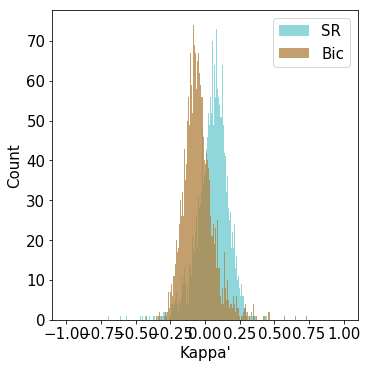

In [46]:
# kappa histograms plot

    # options
fs=15 # font
a=0.75 # alpha
bins=np.linspace(-1,1,300)

    # plot
fig, ax = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
ct.kappa_p.SR.plot.hist(ax=ax,alpha=a, color='#6BCAD0', bins=bins)
ct.kappa_p.Bic.plot.hist(ax=ax,alpha=a, color='#B07F3E', bins=bins)

    # look nice
ax.legend(fontsize=fs)
plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs)
ax.legend(loc="upper right", fontsize=fs)
ax.set_xlabel('Kappa\'', fontsize=fs)
ax.set_ylabel('Count', fontsize=fs)
# fig.savefig(os.path.join(plots_dir, 'plot_hist1.png'), dpi=300)

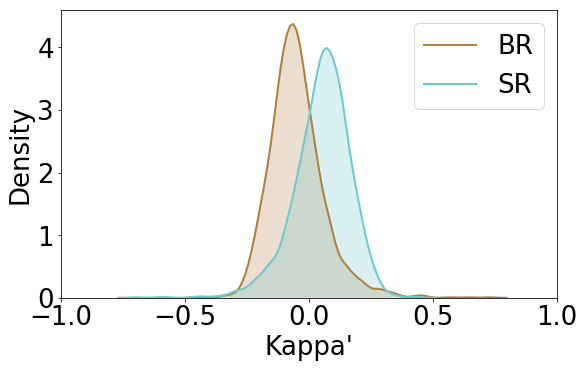

In [50]:
# Density Plot and Histogram # from https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
fig, ax = plt.subplots(1, 1, figsize=(8, 5), constrained_layout=True)
sns.distplot(ct.kappa_p.Bic[~np.isnan(ct.kappa_p.Bic)], hist=False, kde=True, ax=ax, label='Bic',
             bins=int(180/5), color = '#B07F3E', 
             hist_kws={'edgecolor':'#B07F3E'},
             kde_kws={'linewidth': 2, 'shade':'True'})
sns.distplot(ct.kappa_p.SR[~np.isnan(ct.kappa_p.SR)], hist=False, kde=True, ax=ax, label='SR',
             bins=int(180/5), color = '#6BCAD0', 
             hist_kws={'edgecolor':'#6BCAD0'},
             kde_kws={'linewidth': 2, 'shade':'True'})

    # look nice
# ax.legend(fontsize=fs)
plt.legend(prop={'size': 16}, title = 'Airline')
plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs)
ax.legend(loc="upper right", fontsize=fs)
ax.set_xlabel('Kappa\'', fontsize=fs)
ax.set_ylabel('Density', fontsize=fs)

    # save
fig.savefig(os.path.join(plots_dir, 'plot_hist_kappa_p_kde1.png'), dpi=300)

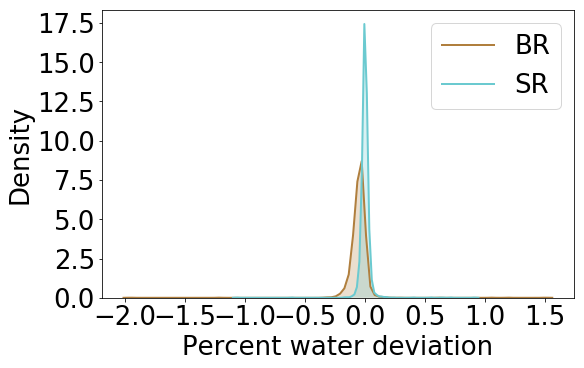

In [48]:
# Density Plot and Histogram # from https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
fs=26
fig, ax = plt.subplots(1, 1, figsize=(8, 5), constrained_layout=True)
pwd_bic=ct.percent_water.Bic-ct.percent_water.HR
pwd_sr=ct.percent_water.SR-ct.percent_water.HR
sns.distplot(pwd_bic[np.abs(pwd_bic)<2], hist=False, kde=True, ax=ax, label='Bic',
             bins=int(180/5), color = '#B07F3E', 
             hist_kws={'edgecolor':'#B07F3E'},
             kde_kws={'linewidth': 2, 'shade':'True'})
sns.distplot(pwd_sr[np.abs(pwd_sr)<2], hist=False, kde=True, ax=ax, label='SR',
             bins=int(180/5), color = '#6BCAD0', 
             hist_kws={'edgecolor':'#6BCAD0'},
             kde_kws={'linewidth': 2, 'shade':'True'})

    # look nice
# ax.legend(fontsize=fs)
plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs) # np.linspace(-0.001,0.001, 5)
ax.legend(('BR','SR'), loc="upper right", fontsize=fs)
ax.set_xlabel('Percent water deviation', fontsize=fs)
ax.set_ylabel('Density', fontsize=fs)
# plt.xlim([-2,2])

    # save
fig.savefig(os.path.join(plots_dir, 'plot_hist_per_water_kde1.png'), dpi=300)

In [18]:
np.abs(-9)

9

In [19]:
?plt.yticks

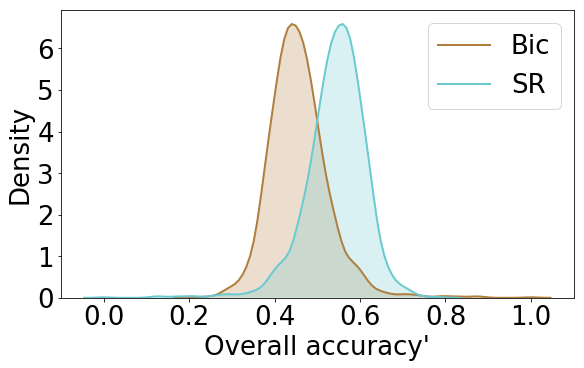

In [49]:
# Density Plot and Histogram # from https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
fig, ax = plt.subplots(1, 1, figsize=(8, 5), constrained_layout=True)
sns.distplot(ct.accuracy_p.Bic[~np.isnan(ct.accuracy_p.Bic)], hist=False, kde=True, ax=ax, label='Bic',
             bins=int(180/5), color = '#B07F3E', 
             hist_kws={'edgecolor':'#B07F3E'},
             kde_kws={'linewidth': 2, 'shade':'True'})
sns.distplot(ct.accuracy_p.SR[~np.isnan(ct.accuracy_p.SR)], hist=False, kde=True, ax=ax, label='SR',
             bins=int(180/5), color = '#6BCAD0', 
             hist_kws={'edgecolor':'#6BCAD0'},
             kde_kws={'linewidth': 2, 'shade':'True'})

    # look nice
# ax.legend(fontsize=fs)
plt.legend(prop={'size': 16}, title = 'Airline')
plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs)
ax.legend(loc="upper right", fontsize=fs)
ax.set_xlabel('Overall accuracy\'', fontsize=fs)
ax.set_ylabel('Density', fontsize=fs)

    # save
fig.savefig(os.path.join(plots_dir, 'plot_hist_OA_p_kde1.png'), dpi=300)

In [24]:
?sns.distplot

In [26]:
?plt.hist

In [10]:
ct.mean()

               res
percent_water  Bic     25.454658
               HR      25.394200
               LR      25.436819
               SR      25.403698
mean_ndwi      Bic    180.057808
               HR     180.133054
               LR     180.075841
               SR     177.686684
median_ndwi    Bic    198.636385
               HR     198.464789
               LR     198.677934
               SR     195.731690
accuracy       Bic      0.990983
               HR            NaN
               LR            NaN
               SR       0.991248
accuracy_p     Bic      0.439133
               HR            NaN
               LR            NaN
               SR       0.560867
kappa          Bic      0.959795
               HR            NaN
               LR            NaN
               SR       0.966612
kappa_p        Bic      0.024954
               HR            NaN
               LR            NaN
               SR       0.110436
min_ndwi       Bic     16.300939
               HR      1

In [10]:
# This works!
# reset index, then unstack https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html

# dataW=data.reset_index(['num','thresh'])
# data.reindex(index=['num','thresh'])
dataW=data.set_index(['thresh', 'res','num',])
del dataW['name']
dataW

percent_water  mean_ndwi  median_ndwi  accuracy  accuracy_p  \
thresh res num                                                                 
0.0    SR  0          8.512153  201.99965        215.0  0.997101    0.671296   
       HR  0          8.506076  207.88528        222.0       NaN         NaN   
       LR  0          8.637153  207.84766        222.0       NaN         NaN   
       Bic 0          8.746528  207.83630        222.0  0.995174    0.328704   
       SR  1         16.425347  203.24974        232.0  0.992873    0.602622   
...                        ...        ...          ...       ...         ...   
       Bic 2128       7.195313  201.14601        208.0  0.990686    0.339216   
       SR  2129      10.691406  203.08470        213.0  0.989362    0.471863   
       HR  2129      10.440104  208.26823        219.0       NaN         NaN   
       LR  2129      10.112847  208.19705        219.0       NaN         NaN   
       Bic 2129      10.233507  208.19495        219.0  0.990061    0.528137   

                    kappa   kappa_p  min_ndwi  max_ndwi  
thresh res num                                           
0.0    SR  0     0.981379  0.223808       3.0     255.0  
       HR  0          NaN       NaN      12.0     255.0  
       LR  0          NaN       NaN      18.0     255.0  
       Bic 0     0.969385  0.000000       8.0     255.0  
       SR  1     0.974029  0.205630      17.0     255.0  
...                   ...       ...       ...       ...  
       Bic 2128  0.927275  0.000000      12.0     255.0  
       SR  2129  0.943712  0.000000      13.0     255.0  
       HR  2129       NaN       NaN      26.0     255.0  
       LR  2129       NaN       NaN      35.0     255.0  
       Bic 2129  0.946381  0.034496      28.0     255.0  

[8520 rows x 9 columns]

In [11]:
# cross-tabulate and looks at summary stats
data.groupby(['res','thresh']).describe()
group1=data[['num', 'res','thresh','percent_water','median_ndwi','accuracy','accuracy_p','kappa', 'kappa_p']].groupby(['res','thresh']).mean()
del group1['num']
group1
# data[['res','thresh','kappa']].groupby(['res']).describe(percentiles=[0.5]) # groupby ,'thresh' as well

,,percent_water,median_ndwi,accuracy,accuracy_p,kappa,kappa_p
res,thresh,,,,,,
Bic,0.0,25.454658,198.636385,0.990983,0.439133,0.959795,0.024954
HR,0.0,25.394200,198.464789,NaN,NaN,NaN,NaN
LR,0.0,25.436819,198.677934,NaN,NaN,NaN,NaN
SR,0.0,25.403698,195.731690,0.991248,0.560867,0.966612,0.110436


In [12]:
dataW1=data.set_index(['res','thresh','num',])
del dataW1['name']
dataW1.count()

percent_water    8520
mean_ndwi        8520
median_ndwi      8520
accuracy         4260
accuracy_p       4254
kappa            4254
kappa_p          4254
min_ndwi         8520
max_ndwi         8520
dtype: int64

In [13]:
# replicate plots from first paper - test
dataW1
group1.RMSE=[np.nan]
group1
# meanSq=metrics.mean_squared_error(dataW1)
dataW1.loc[('HR', 0)].percent_water
print('RMSE', (metrics.mean_squared_error(dataW1.loc[('HR', 0)].percent_water, dataW1.loc[('SR', 0)].percent_water))**0.5)
print('MAE', metrics.mean_absolute_error(dataW1.loc[('HR', 0)].percent_water, dataW1.loc[('SR', 0)].percent_water))

RMSE 1.1290463513908007
MAE 0.2169003896061555


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  


In [14]:
group1.index.levels[1]
group1.loc[('Bic', 0)]
group1['p_water_rmse']=np.nan
group1['p_water_mae']=np.nan
group1['p_water_cov']=np.nan
group1['p_water_mean_dev']=np.nan

In [15]:
# repeat in loop to save data vals for plotting
group1
for i in group1.index.levels[0]: # res
    for j in group1.index.levels[1]: # thresh
#         print(i)
        if i == 'HR':
            group1.loc[(i, j)].p_water_rmse, group1.loc[(i, j)].p_water_mae, group1.loc[(i, j)].p_water_mean_dev, group1.loc[(i, j)].p_water_mean_dev = (np.nan, np.nan, np.nan,np.nan)
        else:
            group1.loc[(i, j)].p_water_rmse=(metrics.mean_squared_error(dataW1.loc[('HR', j)].percent_water, dataW1.loc[(i, j)].percent_water))**0.5
            group1.loc[(i, j)].p_water_mae=metrics.mean_absolute_error(dataW1.loc[('HR', j)].percent_water, dataW1.loc[(i, j)].percent_water)
            group1.loc[(i, j)].p_water_cov=np.cov(pd.DataFrame(data=[dataW1.loc[('HR', j)].percent_water, dataW1.loc[(i, j)].percent_water]))[0,1]
            group1.loc[(i, j)].p_water_mean_dev=group1.loc[('HR', j)].percent_water-group1.loc[(i, j)].percent_water
group1

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  # This is added back by InteractiveShellApp.init_path()


,,percent_water,median_ndwi,accuracy,accuracy_p,kappa,kappa_p,p_water_rmse,p_water_mae,p_water_cov,p_water_mean_dev
res,thresh,,,,,,,,,,
Bic,0.0,25.454658,198.636385,0.990983,0.439133,0.959795,0.024954,1.229084,0.291117,452.895096,-0.060458
HR,0.0,25.394200,198.464789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LR,0.0,25.436819,198.677934,NaN,NaN,NaN,NaN,0.915515,0.299729,452.983165,-0.042620
SR,0.0,25.403698,195.731690,0.991248,0.560867,0.966612,0.110436,1.129046,0.216900,454.678906,-0.009498


Thres: 0.0 
group:



,,percent_water,median_ndwi,accuracy,accuracy_p,kappa,kappa_p,p_water_rmse,p_water_mae,p_water_cov,p_water_mean_dev
res,thresh,,,,,,,,,,
Bic,0.0,25.454658,198.636385,0.990983,0.439133,0.959795,0.024954,1.229084,0.291117,452.895096,-0.060458
HR,0.0,25.394200,198.464789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LR,0.0,25.436819,198.677934,NaN,NaN,NaN,NaN,0.915515,0.299729,452.983165,-0.042620
SR,0.0,25.403698,195.731690,0.991248,0.560867,0.966612,0.110436,1.129046,0.216900,454.678906,-0.009498


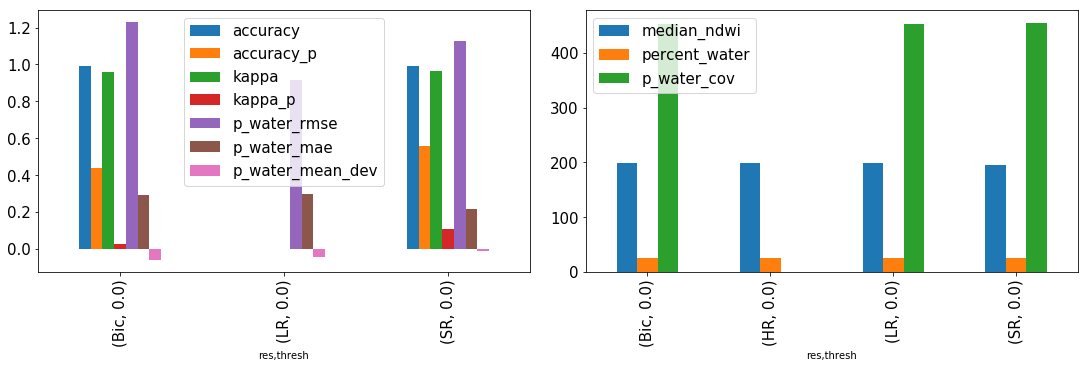

In [17]:
# groupby, then plot (legacy)

group11=group1.groupby(level='thresh', squeeze=True)

    # plot options
fs =15 # font size

# group11 =group1.reset_index()
# group11.groupby(['res', 'thresh']).mean()
# fig, ax = plt.subplots(len(group1.index.levels[0]),1)
k=0 # init
# group11.set_index(['thresh','res'])
for thresh, res in group11:
    print('Thres:', thresh, '\ngroup:\n')
#     print('Res:', res, '\ngroup:\n')
    display(res.head(20))
#     ax[k].bar(res)
#     plt.subplot(len(group1.index.levels[0]),1,k+1)

        # uncomment for various plots:
    fig, axs = plt.subplots(1, 2, figsize=(15, 5), constrained_layout=True)
#     res[['percent_water'	,'median_ndwi'	,'kappa',	'p_water_rmse',	'p_water_mae',		'p_water_mean_dev']].plot.bar(subplots=False) # rm cov
    res.iloc[[0,2,3],:][['accuracy','accuracy_p','kappa','kappa_p','p_water_rmse','p_water_mae','p_water_mean_dev']].plot.bar(subplots=False, ax=axs[0], fontsize=fs) # rm cov
    res[['median_ndwi', 'percent_water', 'p_water_cov']].plot.bar(subplots=False, ax=axs[1], fontsize=fs)
    for j in range(len(axs)): 
        axs[j].legend(fontsize=fs)
#         axs[j].yticks(fontsize=fs)
#     axs[0].xticks(range(3),['Cub','LR','SR'], fontsize=fs)
#     axs[1].xticks(range(4),['Cub','HR','LR','SR'], fontsize=fs)
    k+=1
fig.savefig(os.path.join(plots_dir, 'plot_supp2.png'), dpi=300)

In [18]:
dir(axs[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_mouseover_set',
 '_navi

,percent_water,median_ndwi,accuracy,accuracy_p,kappa,kappa_p,p_water_rmse,p_water_mae,p_water_cov,p_water_mean_dev
res,,,,,,,,,,
Bic,25.454658,198.636385,0.990983,0.439133,0.959795,0.024954,1.229084,0.291117,452.895096,-0.060458
HR,25.394200,198.464789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LR,25.436819,198.677934,NaN,NaN,NaN,NaN,0.915515,0.299729,452.983165,-0.042620
SR,25.403698,195.731690,0.991248,0.560867,0.966612,0.110436,1.129046,0.216900,454.678906,-0.009498


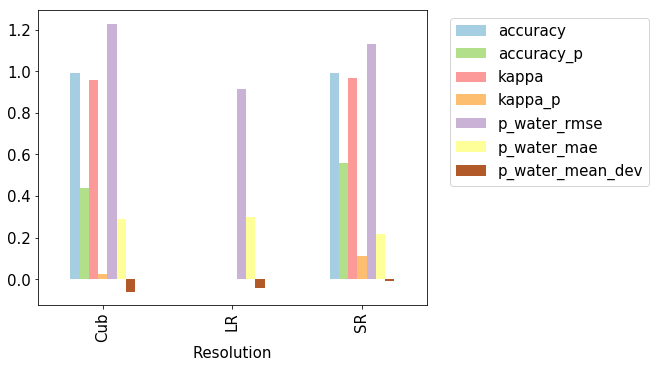

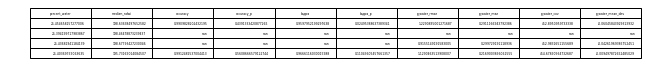

In [22]:
fs=15
fig, ax1 = plt.subplots(figsize=(9,5), constrained_layout=True)
# group1_plot=group1.iloc[[0,1,3]]
group1_plot=group1.copy()
group1_plot.reset_index(level=1,drop=True, inplace=True)
display(group1_plot)
# del group1_plot[2:3]
group1_plot.iloc[[0,2,3]][['accuracy','accuracy_p','kappa','kappa_p','p_water_rmse','p_water_mae','p_water_mean_dev']].plot.bar(ax=ax1, cmap='Paired')
# plt.xticks(range(4),['Cub','HR','LR','SR'], fontsize=fs)
plt.xticks(range(3),['Cub','LR','SR'], fontsize=fs)
plt.yticks(fontsize=fs)
# ax2=ax1.twinx()
# group1['percent_water'].plot.bar(ax=ax2)
# ax1.legend(fontsize=fs, loc='outer right')
ax1.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=fs)
ax1.set_xlabel('Resolution', fontsize=fs)

# savefig
fig.savefig(os.path.join(plots_dir, 'plot_supp1_oa.png'), dpi=300)

# save table
fig2, ax2 = plt.subplots(figsize=(9,1), constrained_layout=True)
ax2.table(cellText=group1_plot.values, colLabels=group1_plot.columns, loc='center', fontsize=fs*2)
ax2.set_axis_off()
fig2.savefig(os.path.join(plots_dir, 'table_supp1_oa.pdf'), bbox_inches='tight', dpi=300)

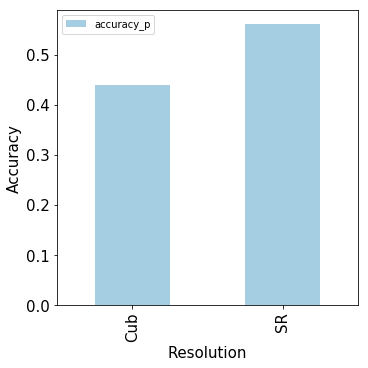

In [26]:
# simple plot
fs=15
fig, ax1 = plt.subplots(figsize=(5,5), constrained_layout=True)
group1_plot.iloc[[0,3]][['accuracy_p']].plot.bar(ax=ax1, cmap='Paired')
# plt.xticks(range(4),['Cub','HR','LR','SR'], fontsize=fs)
plt.xticks(range(2),['Cub','SR'], fontsize=fs)
plt.yticks(fontsize=fs)
# ax2=ax1.twinx()
# group1['percent_water'].plot.bar(ax=ax2)
# ax1.legend(fontsize=fs, loc='outer right')
# ax1.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=fs)
ax1.set_xlabel('Resolution', fontsize=fs)
ax1.set_ylabel('Accuracy', fontsize=fs)

# savefig
fig.savefig(os.path.join(plots_dir, 'plot_1_oa.png'), dpi=300)

In [23]:
?plt.savefig

In [162]:
group1_plot=group1.copy()
group1_plot.reset_index(level=1,drop=True, inplace=True)
# group1_plot.drop_index()
group1_plot.iloc[2,:]
# group1_plot

AttributeError: __delitem__

,,percent_water,median_ndwi,kappa,kappa_p,p_water_rmse,p_water_mae,p_water_cov,p_water_mean_dev
res,thresh,,,,,,,,
Bic,0.0,25.454658,198.636385,0.959795,-0.072545,1.229084,0.291117,452.895096,-0.060458
HR,0.0,25.394200,198.464789,NaN,NaN,NaN,NaN,NaN,NaN
SR,0.0,25.403698,195.731690,0.966612,0.087026,1.129046,0.216900,454.678906,-0.009498


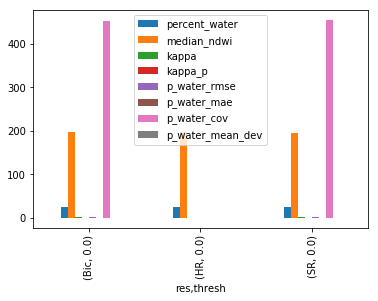

In [127]:
group1_plot.plot.bar()
# group1_plot[['kappa', 'kappa_p']].plot.bar()
group1_plot
# plt.bar(range(3),group1_plot)

# Scratch paper

In [10]:
    # filter out rows with all or no water # uncomment to use # 
print('Ct length before: {}'.format(len(ct)))
print('Number of nearly uniform images: {}'.format(np.sum(np.all((ct.percent_water<2.) | (ct.percent_water>98.), axis=1))))
uniform_mask=np.all((ct.percent_water<2.) | (ct.percent_water>98.), axis=1)
ct.drop(index=(ct[uniform_mask]).index, inplace=True)
# del ct[uniform_mask]
print('Ct length after: {}'.format(len(ct)))

Ct length before: 2130
Number of nearly uniform images: 38
Ct length after: 2092


In [13]:
# filter out nearly uniform imgs, using index modified from ct

(ct[uniform_mask]).index
uniform_mask_dataW=np.isin(dataW.index.get_level_values(2), np.where(uniform_mask))
print('dataW length before: {}'.format(len(dataW)))
dataW.drop(index=(dataW[uniform_mask_dataW]).index, inplace=True)
print('dataW length after: {}'.format(len(dataW)))

dataW length before: 8520
dataW length after: 8368


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# filter out nearly uniform imgs, using index modified from ct (for dataW)

print('data length before: {}'.format(len(data)))
data.drop(index=(data[uniform_mask_dataW]).index, inplace=True)
print('data length after: {}'.format(len(data)))

data length before: 8520
data length after: 8368
